In [0]:
import math
import numpy as np
import matplotlib.pyplot as plt

F = np.array([[-1,0],[0,1]])

ACB = [150, -60, 60, -90]
ABC = [150, 60, -60, 30]
BAC = [-90, -60, 60, 30]
BCA = [-90, 60, -60, 150]
CBA = [30, -60, 60, 150]
CAB = [30, 60, -60, -90]

del_s=np.exp(1.31j)
del_p=np.exp(2.05j)

P=np.array([[del_s, 0],[0, del_p]])

def Rotation(ang):
    return np.array([[np.cos(ang),np.sin(ang)], [-np.sin(ang),np.cos(ang)]])

def total_matrix(direction):
    r0 = np.dot(P, Rotation(direction[0]))
    r1 = np.dot(Rotation(direction[1]),r0)
    r1 = np.dot(P,r1)
    r2 = np.dot(Rotation(direction[2]),r1)
    r2 = np.dot(P,r2)
    r3 = np.dot(Rotation(direction[3]),r2)
    return np.dot(F,r3)

def OutSignal(side,ang_in,ang_pol):
    Pin = np.array([[np.cos(math.radians(ang_in))],[np.sin(math.radians(ang_in))]])
    Pout = abs(np.dot(total_matrix(side),Pin))
    Ex = Pout[[0],[0]] * np.cos(math.radians(ang_pol))
    Ey = Pout[[1],[0]] * np.sin(math.radians(ang_pol))
    return np.sqrt(Ex**2 + Ey**2)

def graph(inPol,polcam):
    pixel = np.zeros((400,400))

    #inPol = 90
    #polcam = 90
    for x in range(400):
        for y in range(400):
            if y < 200 and x < (y-200)/np.sqrt(3) + 200: #CAB
                color = 256 * OutSignal(CAB,inPol,polcam)
                pixel[[x],[y]]=color
            elif x > (y-200)/np.sqrt(3) + 200 and x < -(y-200)/np.sqrt(3) + 200: #CBA
                color = 256 * OutSignal(CBA,inPol,polcam)
                pixel[[x],[y]]=color
            elif x > -(y-200)/np.sqrt(3) + 200 and y < 200 : #BCA
                color = 256 * OutSignal(BCA,inPol,polcam)
                pixel[[x],[y]]=color
            elif y > 200 and x > (y-200)/np.sqrt(3) + 200 : #BAC
                color = 256 * OutSignal(BAC,inPol,polcam)
                pixel[[x],[y]]=color
            elif x < (y-200)/np.sqrt(3) + 200 and x > -(y-200)/np.sqrt(3) + 200: #ABC
                color = 256 * OutSignal(ABC,inPol,polcam)
                pixel[[x],[y]]=color
            elif y > 200 and x < -(y-200)/np.sqrt(3) + 200: #CAB
                color = 256 * OutSignal(CAB,inPol,polcam)
                pixel[[x],[y]]=color
    
    return pixel



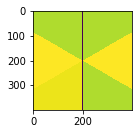

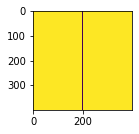

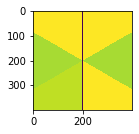

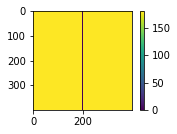

In [17]:
    InPol = 90

    plt.subplot(221)
    plt.imshow(graph(InPol,0))
    plt.show()
    plt.subplot(222)
    plt.imshow(graph(InPol,45))
    plt.show()
    plt.subplot(223)
    plt.imshow(graph(InPol,90))
    plt.show()
    plt.subplot(224)
    plt.imshow(graph(InPol,135))
    plt.colorbar()
    plt.show()

TypeError: ignored

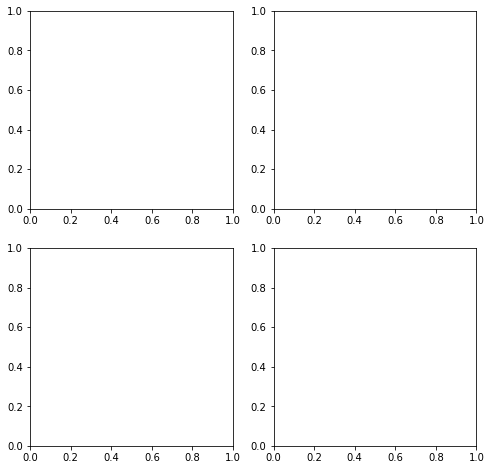

In [15]:
x= np.arange(0,10,0.1)
y= np.sin(x)

fig = plt.figure(figsize=(8,8))

ax = [plt.subplot(2,2,i+1) for i in range(4)]

for i in range(ax):
  i.plot(y)
  i.title("%d"%i)
  i.set_xticklabels([])
  i.set_yticklabels([])
  i.set_aspect('equal')

plt.subplots_adjust(wspace=0, hspace=0)
'''
plt.subplot(221)
plt.plot(y)
plt.title("1")
plt.set_aspect('equal')
plt.subplot(222)
plt.plot(y)
plt.title("2")
plt.set_aspect('equal')
plt.subplot(223)
plt.plot(y)
plt.title("3")
plt.set_aspect('equal')
plt.subplot(224)
plt.plot(y)
plt.title("4")
plt.set_aspect('equal')
'''
plt.savefig("fig2.png")